### Домашнее задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
import pandas
import numpy
import seaborn
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
from sklearn.datasets import load_iris

### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [3]:
def get_data_frame() -> pandas.DataFrame:
    iris = load_iris()
    data = pandas.DataFrame(data=numpy.c_[iris['data'], iris['target']],
                            columns=iris['feature_names'] + ['target'])
    data = data[['sepal length (cm)',
                 'sepal width (cm)',
                 'target']]

    #data['target'] = data['target'].apply(lambda value: iris['target_names'][int(value)])
    return data

iris_data_frame = get_data_frame()

### 3. Разделите данные на выборку для обучения и тестирования


In [4]:
x_train, \
x_test, \
y_train, \
y_test = train_test_split(iris_data_frame[['sepal length (cm)',
                                           'sepal width (cm)']],
                          iris_data_frame['target'],
                          test_size=0.25)

### 4. Постройте модель LDA

In [5]:
linear_discriminant = LinearDiscriminantAnalysis().fit(x_train, y_train)

### 5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).

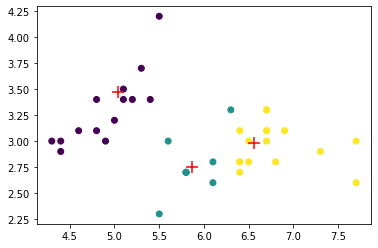

In [6]:
def show_graph(x_test: pandas.DataFrame,
               linear_discriminant: LinearDiscriminantAnalysis):
    pylab.scatter(x=x_test['sepal length (cm)'],
                  y=x_test['sepal width (cm)'],
                  c=linear_discriminant.predict(x_test))
    pylab.scatter(x=linear_discriminant.means_[:, 0],
                  y=linear_discriminant.means_[:, 1],
                  c='r',
                  s=150,
                  marker='+')

show_graph(x_test=x_test,
           linear_discriminant=linear_discriminant)

### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [7]:
small_iris_data_frame = iris_data_frame[['sepal length (cm)',
                                         'sepal width (cm)']]

small_iris_data_frame

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

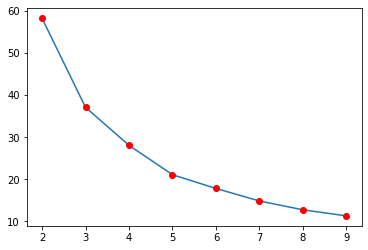

In [8]:
def show_inertia_graph(small_iris_data_frame: pandas.DataFrame):
    inertia = []
    clusters_range = range(2, 10)

    for index in clusters_range:
        k_means = KMeans(n_clusters=index)
        _ = k_means.fit_predict(small_iris_data_frame)
        inertia.append(k_means.inertia_)

    pylab.plot(clusters_range, inertia)
    pylab.plot(clusters_range, inertia, 'ro')

show_inertia_graph(small_iris_data_frame)

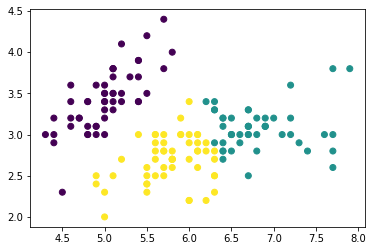

In [9]:
def show_clusters_graph(small_iris_data_frame: pandas.DataFrame):
    clusters_n = 3
    clusters = KMeans(n_clusters=clusters_n).fit_predict(small_iris_data_frame)
    pylab.scatter(x=small_iris_data_frame['sepal length (cm)'],
                y=small_iris_data_frame['sepal width (cm)'],
                c=clusters)

show_clusters_graph(small_iris_data_frame)

### Дополнительное задание - оценить точность модели классификации

In [10]:
linear_discriminant.score(x_test, y_test)

0.7894736842105263